# Pymaceuticals Inc.
---

### Analysis

	Capomulin, the drug of interest in this analysis, showed a similar efficacy to Ramicane, but the dataset showed it to be much more effective than the other drug regimens in reducing tumor size. The results were consistent across the board, with only one outlier found throughout the dataset. 
 In the line graph plotting tumor volume throughout the treatment course for a single mouse treated with Capomulin, there was a consistent decrease in size over the timepoints. These results are very encouraging, but displaying Capomulins efficacy over its competitoss wouldbe  informative.    
There was a strong correlation between mouse weight and the average tumor volume with the Capomulin treatment, with a Pearson's R value of 0.84. On the surface this makes sense, as larger mice could grow larger tumors, but further analysis could be done to understand this relationshi
 

In [233]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# initially received a list output using .duplicated, added ["Mouse ID"].unique to just see 1 value
duplicate_data = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_data 

array(['g989'], dtype=object)

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study.loc[mouse_study["Mouse ID"] == "g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#instead of removing data from the dataframe, I decided to make a new dataframe that excluded the duplicate mouse
clean_mouse_study = mouse_study[mouse_study["Mouse ID"] != "g989"]
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study["Mouse ID"].unique())

248

## Summary Statistics

In [29]:
tumor_std = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_table = pd.DataFrame ({"Mean Tumor Volume": tumor_mean,
                             "Median Tumor Volume": tumor_median,
                             "Tumor Volume Variance": tumor_variance,
                             "Tumor Volume Std Dev": tumor_std,
                             "Tumor Volume Std Err": tumor_sem})
tumor_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Mouse Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

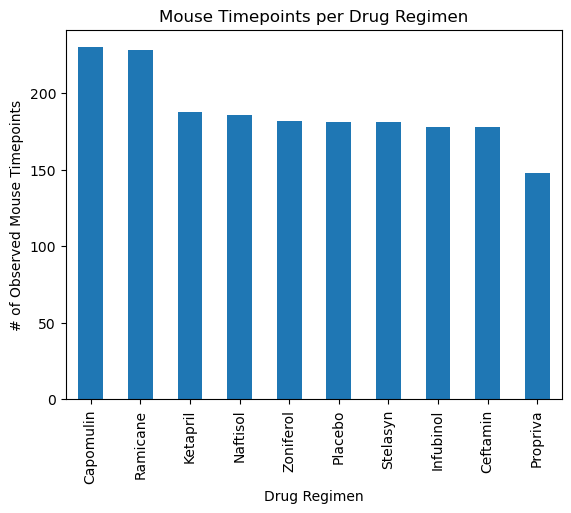

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_mouse_drug = clean_mouse_study["Drug Regimen"].value_counts()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Timepoints per Drug Regimen")
bar_mouse_drug.plot.bar()

Text(0.5, 1.0, 'Mouse Timepoints per Drug Regimen')

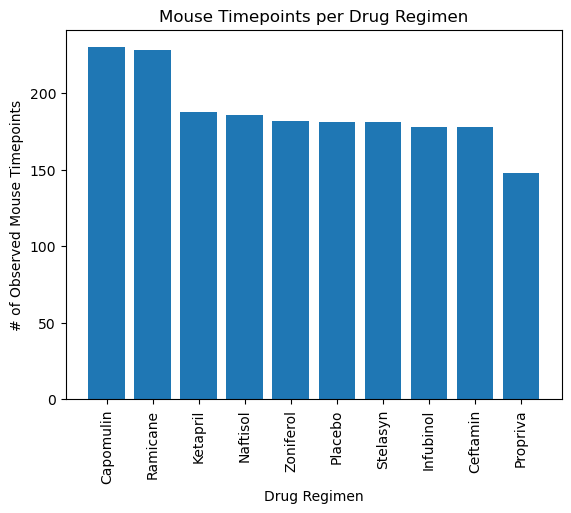

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#used value counts and np.arange (extra import) to make the graph. 
drug_counts = clean_mouse_study["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_counts))
plt.bar(x_axis, drug_counts)
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, drug_counts.index.values, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Timepoints per Drug Regimen")

Text(0.5, 1.0, 'Gender Distribution')

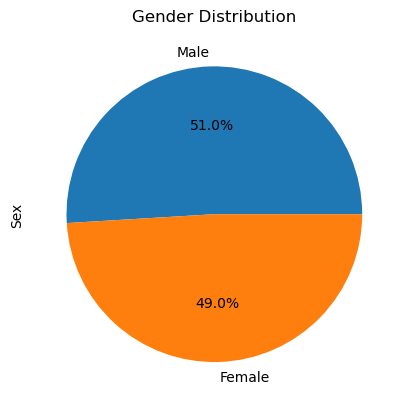

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mouse = clean_mouse_study["Sex"].value_counts()
gender_mouse.plot(kind="pie",y="", x=gender_mouse, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Gender Distribution')

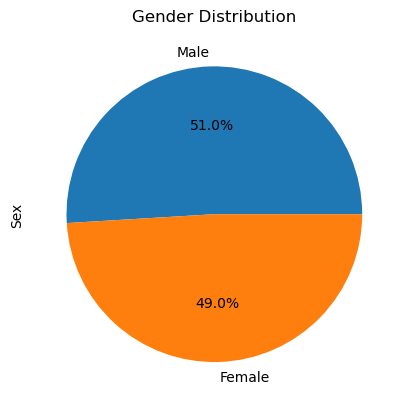

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
counts = [958, 922]
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.title("Gender Distribution")

## Quartiles, Outliers and Boxplots

In [159]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_volume = clean_mouse_study.groupby(clean_mouse_study["Mouse ID"])["Timepoint"].max().reset_index()
final_volume
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_study_finalv = pd.merge(clean_mouse_study, final_volume, on="Mouse ID", how="left")
clean_study_finalv

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [168]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

#created for loop to add values to drug_values
for drug in drug_regimen:

#reduced the dataframe to just include the treatments of interest
    reduced_treatments = clean_study_finalv.loc[clean_study_finalv["Drug Regimen"] == drug]

#Reducing dataframe to only contain the final volume/highest timepoint of the tumor
    
    last_timepoint = reduced_treatments.loc[reduced_treatments["Timepoint_x"] == reduced_treatments["Timepoint_y"]]

#Append drug_values list 
    final_values = last_timepoint["Tumor Volume (mm3)"]
    drug_values.append(final_values)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    #calculated the iqr and upper/lower bounds
    quartiles = final_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 

    # Determine outliers using upper and lower bounds
    #unsure how to clean up the output but the information looks the same as the sample 
    outliers = last_timepoint.loc[(last_timepoint["Tumor Volume (mm3)"] < lower_bound) | (last_timepoint["Tumor Volume (mm3)"] > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint_x, Tumor Volume (mm3), Metastatic Sites, Timepoint_y]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint_x, Tumor Volume (mm3), Metastatic Sites, Timepoint_y]
Index: []
Infubinol's potential outliers:     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint_x  \
669     c326    Infubinol  Female          18          25            5   

     Tumor Volume (mm3)  Metastatic Sites  Timepoint_y  
669           36.321346                 0            5  
Ceftamin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint_x, Tumor Volume (mm3), Metastatic Sites, Timepoint_y]
Index: []


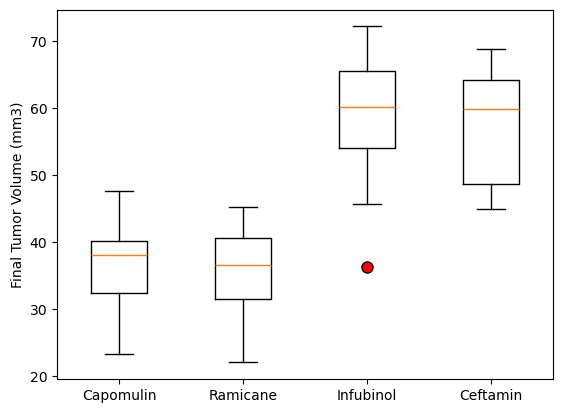

In [174]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#looked up how to do flierprops to visualize outlier
plt.boxplot(drug_values, flierprops=dict(marker="o", markerfacecolor="red", markersize=8))
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

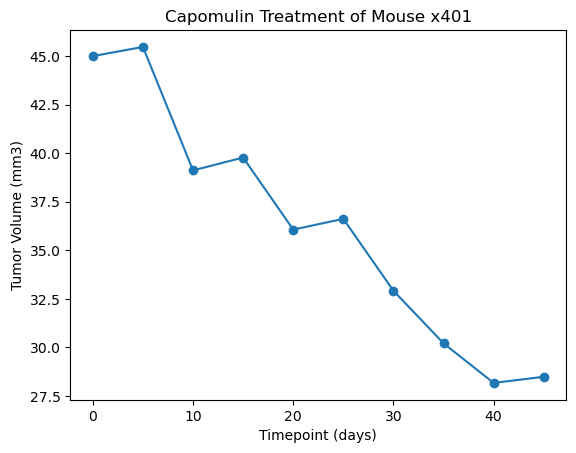

In [227]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#mouse chosen at random from the csv
mouse_solo = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "x401"]

plt.plot(mouse_solo["Timepoint"], mouse_solo["Tumor Volume (mm3)"], marker="o")
plt.title("Capomulin Treatment of Mouse x401")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'Average Tumor Volume in Relation to Mouse Weight')

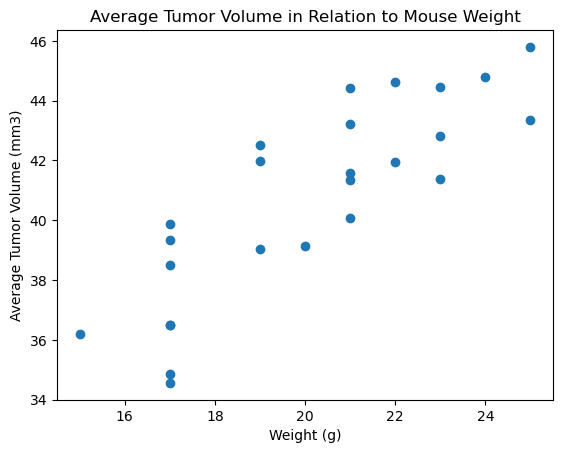

In [230]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#It was a process finding out how to do this, I was pointed in the direction of merging cap_avg to cap dataframe 
#thanks to chatgpt, link provided. did drop_duplicates to just get 1 weight reading per mouse and get desired graph
cap = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
cap_avg = cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().rename("Average Tumor Volume (mm3)")
cap_total = pd.merge(cap, cap_avg, how="left", on="Mouse ID")
clean_cap_total = cap_total[["Weight (g)", "Average Tumor Volume (mm3)"]].drop_duplicates()
plt.scatter(clean_cap_total["Weight (g)"], clean_cap_total["Average Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume in Relation to Mouse Weight")

## Correlation and Regression

 The correlation between mouse weight and the average tumor volume is 0.84


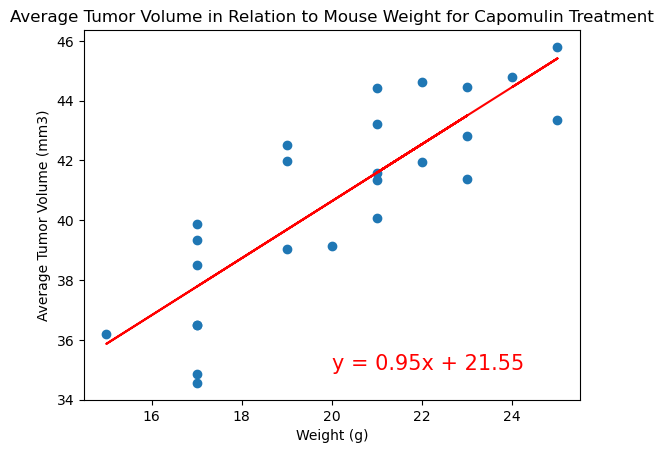

In [232]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#added linregress module just in case. remembed from "vehicles" in class assignment
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_cap_total["Weight (g)"], clean_cap_total["Average Tumor Volume (mm3)"])
regress_values = clean_cap_total["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(clean_cap_total["Weight (g)"], regress_values, "r-")
plt.scatter(clean_cap_total["Weight (g)"], clean_cap_total["Average Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume in Relation to Mouse Weight for Capomulin Treatment")
correlation = st.pearsonr(clean_cap_total["Weight (g)"], clean_cap_total["Average Tumor Volume (mm3)"])
plt.annotate(line_eq, (20, 35), fontsize=15, color="red")
print(f" The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")